In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Principal Component Analysis (PCA)

#### [Wine Data](https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D-pca-principal-component-analysis-%EA%B3%BC-biplot-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%82%AC%EB%A1%80-%EB%A0%88%EB%93%9C%EC%99%80%EC%9D%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-437283592031)

In [4]:
from sklearn.datasets import load_wine
col = load_wine().feature_names
wine_df = pd.DataFrame(load_wine().data,columns = col)
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [55]:
scaler = StandardScaler()
scaled_wine = pd.DataFrame(scaler.fit_transform(wine_df), columns = col)

pca_wine = PCA(n_components=3)
pca_wine.fit(scaled_wine)
print("\n Eigenvectors: \n", pca_wine.components_)
print("\n Eigenvalues: \n",pca_wine.explained_variance_)
PCA_Wine = pca_wine.transform(scaled_wine)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]

 Eigenvalues: 
 [4.73243698 2.51108093 1.45424187]

 Projected Data: 
 [[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.5108743

In [75]:
print(np.dot(scaled_wine.cov(), pca_wine.components_[0]))
print(pca_wine.explained_variance_[0], pca_wine.components_[0])
# scaled_wine.cov().shape

[ 0.68302977 -1.16033477 -0.00970652 -1.13256874  0.67196839  1.86770758
  2.0015099  -1.4127891   1.4832853  -0.41937297  1.40418297  1.78018856
  1.35703684]
4.732436977583594 [ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]


In [57]:
from sklearn.datasets import load_wine
col = load_wine().feature_names
wine_df = pd.DataFrame(load_wine().data,columns = col)
scaler = StandardScaler()
scaled_wine = pd.DataFrame(scaler.fit_transform(wine_df), columns = col)

pca_wine = PCA(n_components=3)
pca_wine.fit_transform(scaled_wine)



array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [15]:
PCA_Wine = pd.DataFrame(data = PCA_Wine, columns = ['PC1','PC2','PC3'])
PCA_Wine['target'] = load_wine().target
PCA_Wine

,PC1,PC2,PC3,target
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


In [52]:
wine_df
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(wine_df), columns = col)
cov_matrix = df.cov()
cov_matrix
values, vector = np.linalg.eig(cov_matrix)
-vector.T


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
        -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
         0.42777141, -0.18412074,  0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

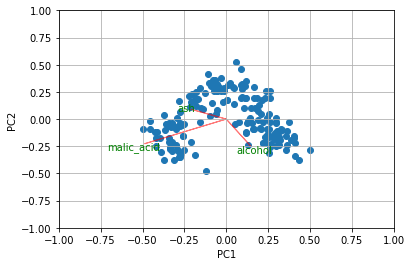

In [53]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    
biplot(B, pca_wine.components_, 1, 2, labels=wine_df.columns)

## Iris_Data

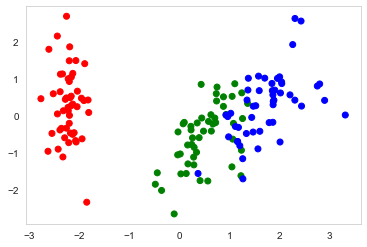

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sns; sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline
np.random.seed(0)

# Iris dataset
DF_data = pd.DataFrame(load_iris().data, 
                       index = ["iris_%d" % i for i in range(load_iris().data.shape[0])],
                       columns = load_iris().feature_names)

Se_targets = pd.Series(load_iris().target, 
                       index = ["iris_%d" % i for i in range(load_iris().data.shape[0])], 
                       name = "Species")

# Scaling mean = 0, var = 1
DF_standard = pd.DataFrame(StandardScaler().fit_transform(DF_data), 
                           index = DF_data.index,
                           columns = DF_data.columns)

# Sklearn for Principal Componenet Analysis
# Dims
m = DF_standard.shape[1]
K = 4

# PCA (How I tend to set it up)
Mod_PCA = decomposition.PCA(n_components=m)
DF_PCA = pd.DataFrame(Mod_PCA.fit_transform(DF_standard), 
                      columns=["PC%d" % k for k in range(1,m + 1)]).iloc[:,:K]
# Color classes
color_list = [{0:"r",1:"g",2:"b"}[x] for x in Se_targets]

fig, ax = plt.subplots()
ax.scatter(x=DF_PCA["PC1"], y=DF_PCA["PC2"], color=color_list)

In [45]:
DF_PCA

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [57]:
iris_cov = irisdf.iloc[:,:-1].cov()
eigvc, eigvl =  np.linalg.eig(iris_cov)



(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [29]:
temp = pd.DataFrame()
temp['x'] = irisdf['petal_length']
temp['y'] = irisdf['sepal_length']
